# Detección de objetos con cvlib

In [10]:
import cv2
import cvlib as cv
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [18, 8]    # incrementar tamaño de plots

def display_color_row(*imgs):
    for i, img in enumerate(imgs):
        print(type(img), img.dtype, img[0,0])
        plt.subplot(1, len(imgs), i + 1)
        plt.imshow(img)
        plt.title(f"{i}")
        plt.xticks([])
        plt.yticks([])

def draw_faces(img, faces):
    img2 = img.copy()
    for x0, y0, x1, y1 in faces:
        genders, confidences = cv.detect_gender(img2[y0:y1, x0:x1])
        idx = np.argmax(confidences)
        gender = genders[idx]
        cv2.rectangle(img2, (x0, y0), (x1, y1), (0, 255, 0), 3)
        cv2.putText(img2, gender, (x0, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    return img2


## Detección de rostros y género

<class 'numpy.ndarray'> uint8 [173 185 145]
<class 'numpy.ndarray'> uint8 [173 185 145]


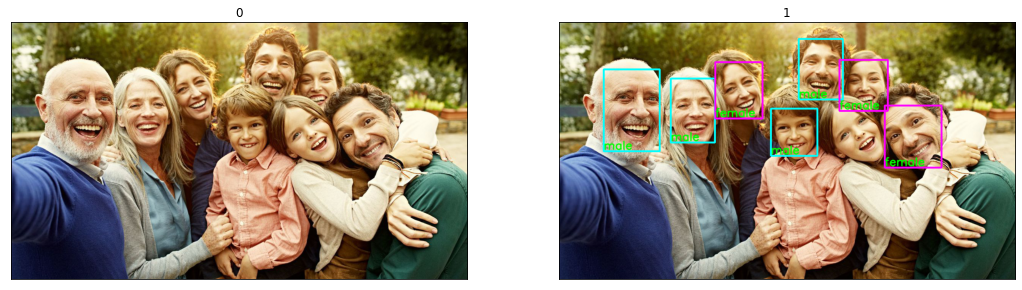

In [11]:
def draw_faces(img, faces):
    img2 = img.copy()
    for x0, y0, x1, y1 in faces:
        genders, confidences = cv.detect_gender(img2[y0:y1, x0:x1])
        idx = np.argmax(confidences)
        gender = genders[idx]
        cv2.rectangle(
            img2, 
            (x0, y0), 
            (x1, y1), 
            (0, 255, 255) if gender == "male" else (255, 0, 255), 
            3
            )
        cv2.putText(img2, gender, (x0, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    return img2

img = image.load_img("../object_detection/familia.jpg")

x = image.img_to_array(img, dtype=np.uint8)

faces, confidences = cv.detect_face(x)

display_color_row(x,draw_faces(x, faces))

## Detección de objetos


<class 'numpy.ndarray'> uint8 [31 26 22]
<class 'numpy.ndarray'> uint8 [31 26 22]


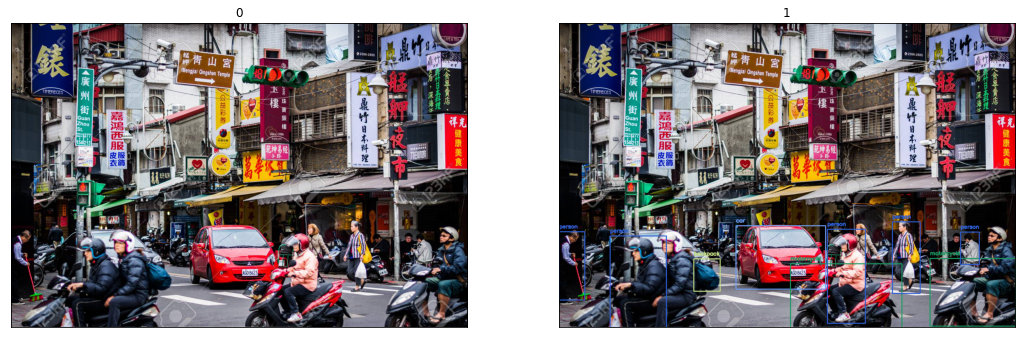

In [16]:
from cvlib.object_detection import draw_bbox

img = image.load_img("street.jpg")
x = image.img_to_array(img, dtype=np.uint8)

bbox, label, conf = cv.detect_common_objects(x, confidence=0.7)

display_color_row(x, draw_bbox(x.copy(), bbox, label, conf))